# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

t has 36501 time steps
M1 final = 333.3333333333658
M2 final = 1066.6666666665792


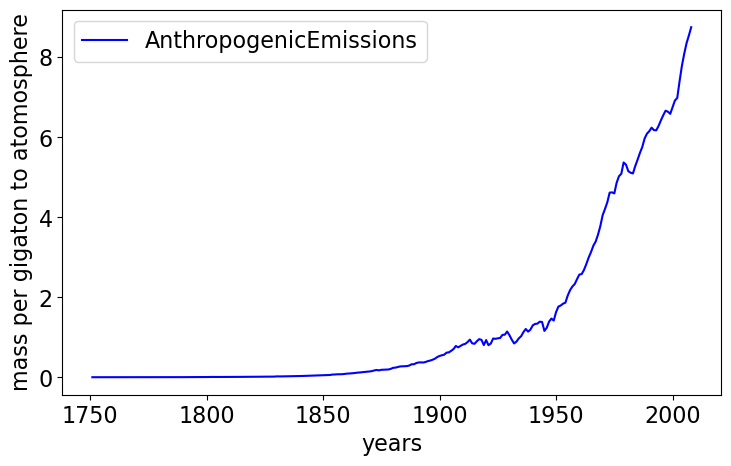

In [1]:
import numpy as np
import matplotlib.pyplot as plt


M1i = 1100.0    #mass in gigatons 
M2i = 300.0

k12 = 0.0003     #inverse years = or per year? = turn over time
k21 = 0.1

ti = 00.0        #time initial
tf = 100       #time unit in years
dt = 1/365

t = np.arange(ti,tf+dt,dt)

Nt = t.size

print('t has '+str(Nt)+' time steps')

M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))


for i in np.arange(Nt):
    if (i==0):  # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
                # then there was no previous step, so the position is 0. If (i>0) the previous location
                # was the value of x at step i-1

        M1[i] = M1i
        M2[i] = M2i
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
        
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt
        
        
        
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)

print('M1 final = '+str(M1[i])+'')
print('M2 final = '+str(M2[i])+'')

historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
year = data[:,0]
cflux = data[:,1]

cflux_t = np.interp(t, year, cflux)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html

plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.title('AnthropogenicEmissions')

plt.subplot(2,1,1)
plt.plot(year,cflux,'b', label='AnthropogenicEmissions')
plt.xlabel('years')
plt.ylabel('mass per gigaton to atomosphere')
plt.legend()

plt.show()

In [2]:

Fa = cflux_t

for i in np.arange(Nt):
    if (i==0):  # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
                # then there was no previous step, so the position is 0. If (i>0) the previous location
                # was the value of x at step i-1

        M1[i] = M1i
        M2[i] = M2i
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]+Fa[i-1]
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
        
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt
        
dM1 = np.diff(M1)
dM2 = np.diff(M2)

M1 = M1[0:i]
M2 = M2[0:i]


print(year)
#print(M1)
#print(M2)
#print(dM1)
#print(dM2)
#print(t)

plt.figure(figsize = (11,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(4,1,1)
plt.plot(year,M1, 'b-', label='Carbon in Atmosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()

#plt.subplot(4,1,2)
#plt.plot(t,M2, 'g-', label='Carbon in Biosphere')
#plt.ylabel('Mass of Carbon [GtC]')
#plt.legend()

#plt.subplot(4,1,3)
#plt.plot(t,dM1, 'b--', label='Change in Carbon in Atmosphere')
#plt.ylabel('Mass of Carbon [GtC]')
#plt.legend()

#plt.subplot(4,1,4)
#plt.plot(t,dM2, 'g--', label='Change in Carbon in Atmosphere')
#plt.xlabel('Time [years]')
#plt.ylabel('Mass of Carbon [GtC]')
#plt.legend()

plt.show()


[1751. 1752. 1753. 1754. 1755. 1756. 1757. 1758. 1759. 1760. 1761. 1762.
 1763. 1764. 1765. 1766. 1767. 1768. 1769. 1770. 1771. 1772. 1773. 1774.
 1775. 1776. 1777. 1778. 1779. 1780. 1781. 1782. 1783. 1784. 1785. 1786.
 1787. 1788. 1789. 1790. 1791. 1792. 1793. 1794. 1795. 1796. 1797. 1798.
 1799. 1800. 1801. 1802. 1803. 1804. 1805. 1806. 1807. 1808. 1809. 1810.
 1811. 1812. 1813. 1814. 1815. 1816. 1817. 1818. 1819. 1820. 1821. 1822.
 1823. 1824. 1825. 1826. 1827. 1828. 1829. 1830. 1831. 1832. 1833. 1834.
 1835. 1836. 1837. 1838. 1839. 1840. 1841. 1842. 1843. 1844. 1845. 1846.
 1847. 1848. 1849. 1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858.
 1859. 1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870.
 1871. 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882.
 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894.
 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 19

ValueError: x and y must have same first dimension, but have shapes (258,) and (36500,)

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

31. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 


In [ ]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_file)
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]